* Targets for this project
- Build a ML classification model
- Use to refresh seaborn, pandas and matplotlib
- Use classification error techniques in text
- Use Cross Validation
- Use inferential python statistics
- Mutual Information
- Feature selection techniques revision

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
# Copy dataset

df_copy = df.copy()

In [4]:
df.info()

df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [6]:
# Label categorical data

cat = (df.dtypes=='object')
cat_col = cat[cat].index

In [7]:
for col in cat_col:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [8]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [9]:
# Check for missing data

df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Exploratory Data Analysis

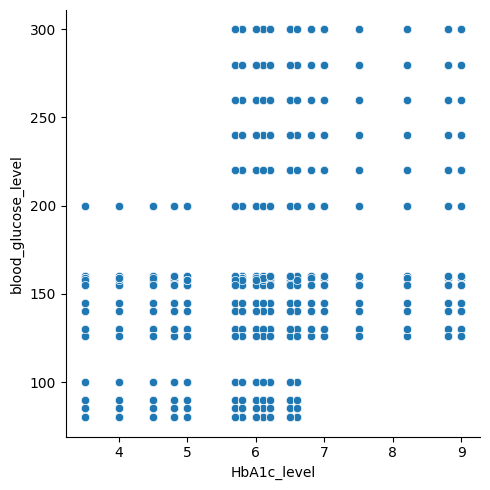

In [11]:
# Check for relationship between Hb1Ac_level and blood_glucose_level

sns.relplot(data=df, x='HbA1c_level', y='blood_glucose_level',
            kind='scatter')

<AxesSubplot:xlabel='HbA1c_level', ylabel='bmi'>

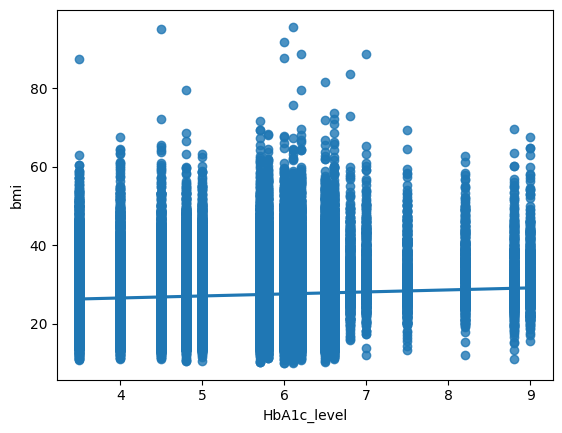

In [13]:
# Check for relationship between Hb1Ac_level and blood_glucose_level

sns.regplot(data=df, x='HbA1c_level', y='bmi')

<AxesSubplot:xlabel='smoking_history', ylabel='blood_glucose_level'>

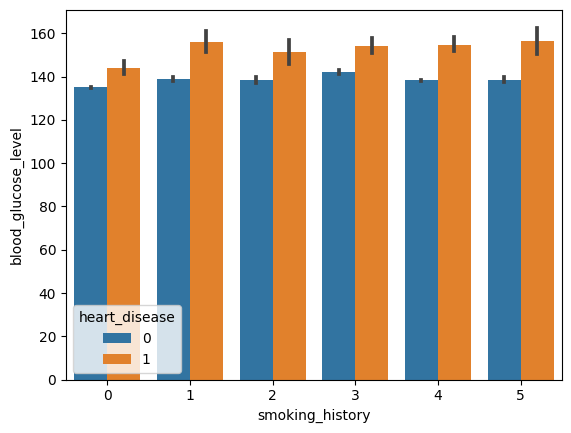

In [15]:
sns.barplot(data=df, x='smoking_history', y='blood_glucose_level',
            hue='heart_disease')

<AxesSubplot:xlabel='smoking_history', ylabel='HbA1c_level'>

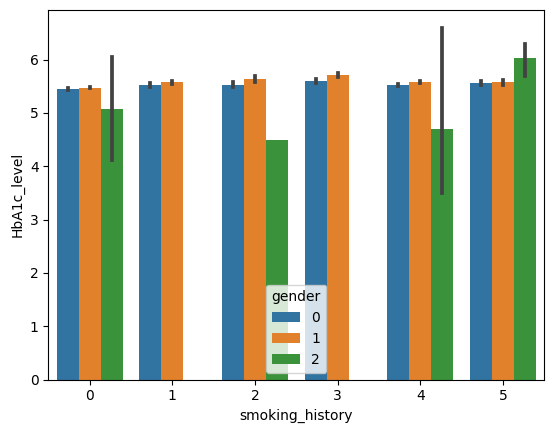

In [14]:
sns.barplot(data=df, x='smoking_history', y='HbA1c_level',
            hue='gender')

Feature Engineering

In [21]:
# Separate train and test set

df.reset_index(drop=True, inplace=True)

y = df['diabetes']

X = df[df.columns.drop('diabetes')]

X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=666)

In [23]:
# Using Mutual Information Score to check features that predict best

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name='MI scores', index=X.columns)

scores = mi_scores.sort_values(ascending=False)

print(scores)

HbA1c_level            0.131718
blood_glucose_level    0.112834
age                    0.040722
bmi                    0.024579
smoking_history        0.013805
hypertension           0.013143
heart_disease          0.009801
gender                 0.005714
Name: MI scores, dtype: float64


MODEL BUILDING

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Log_reg = LogisticRegression()
svc = SVC()

In [38]:
# Fit model to data 

log_reg = Log_reg.fit(X_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
svc.fit(X_train, y_train)

SVC()

Estimating Model Performance

In [39]:
# Check R score of models

print(f"logistics regression score is {Log_reg.score(X_test, y_test)}")
      
print(f"support vector classifier score is {svc.score(X_test, y_test)}")


logistics regression score is 0.9563666666666667
support vector classifier score is 0.9485666666666667


In [40]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, plot_roc_curve, RocCurveDisplay, roc_auc_score

In [41]:
pred = log_reg.predict(X_test)

In [44]:
pred_svc = svc.predict(X_test)

In [43]:
# Evaluation metrics for Logistics Regression Model
print(confusion_matrix(y_test, pred))

'\n'

print(classification_report(y_test, pred))

[[27158   292]
 [ 1017  1533]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27450
           1       0.84      0.60      0.70      2550

    accuracy                           0.96     30000
   macro avg       0.90      0.80      0.84     30000
weighted avg       0.95      0.96      0.95     30000



In [45]:
# Evaluation metrics for SVC Model
print(confusion_matrix(y_test, pred_svc))

'\n'

print(classification_report(y_test, pred_svc))

[[27450     0]
 [ 1543  1007]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27450
           1       1.00      0.39      0.57      2550

    accuracy                           0.95     30000
   macro avg       0.97      0.70      0.77     30000
weighted avg       0.95      0.95      0.94     30000



In [46]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.decision_function(X_test))

Text(0, 0.5, 'TPR (recall)')

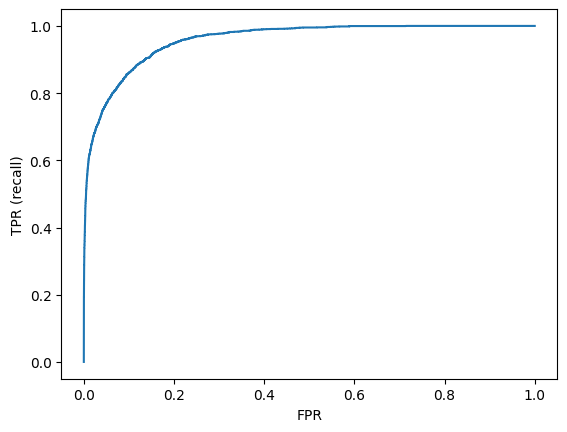

In [47]:
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

In [48]:
print(f"ro_auc score is {roc_auc_score(y_test, log_reg.decision_function(X_test))}")

ro_auc score is 0.9586192864030859


Building Model Using Automatic Feature Seletion Techniques

In [50]:
from sklearn.feature_selection import SelectPercentile

selecter = SelectPercentile(percentile=70)

In [51]:
# Use selecter to trim train set and test set

selecter.fit(X_train, y_train)

SelectPercentile(percentile=70)

In [54]:
X_train_sel = selecter.transform(X_train)
X_test_sel = selecter.transform(X_test)

In [78]:
# Identify selected features

features_sel = selecter.get_feature_names_out()
features_sel

array(['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype=object)

In [60]:
# Train models using selected features  

log_reg_1 = LogisticRegression()

In [64]:
log_reg_1 = log_reg_1.fit(X_train_sel, y_train)

In [66]:
log_reg_1.score(X_test_sel, y_test)

0.9612333333333334

In [67]:
pred_sel = log_reg_1.predict(X_test_sel)

# Evaluation metrics for Logistics Regression Model
print(confusion_matrix(y_test, pred_sel))

'\n'

print(classification_report(y_test, pred_sel))

[[27218   232]
 [  931  1619]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27450
           1       0.87      0.63      0.74      2550

    accuracy                           0.96     30000
   macro avg       0.92      0.81      0.86     30000
weighted avg       0.96      0.96      0.96     30000



ro_auc score is 0.9622093431908282


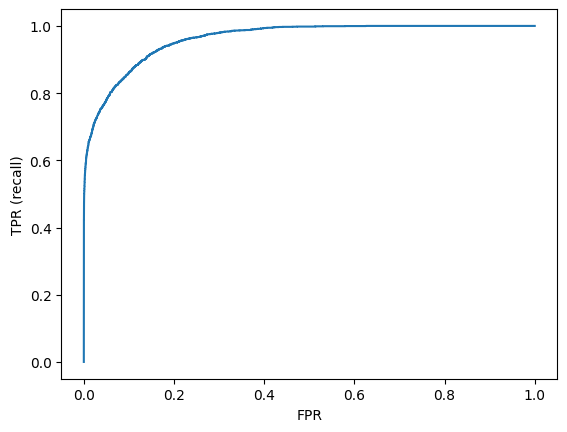

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg_1.decision_function(X_test_sel))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

print(f"ro_auc score is {roc_auc_score(y_test, log_reg_1.decision_function(X_test_sel))}")

Model performs slightly better after selecting features using the Select Percentile univariate method.

Feature Selection Using a Model

In [71]:
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier

In [72]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                        threshold="median")

In [73]:
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [80]:
# Transform train and test data to select for features

X_train_rf = select.transform(X_train)
X_test_rf = select.transform(X_test)

In [85]:
select.get_feature_names_out()

array(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype=object)

In [86]:
# Train model using these selected features 

log_reg_2 = LogisticRegression()

In [87]:
log_reg_2 = log_reg_2.fit(X_train_rf, y_train)

In [88]:
log_reg_2.score(X_test_rf, y_test)

0.9610333333333333

In [89]:
pred_rf = log_reg_2.predict(X_test_rf)

# Evaluation metrics for Logistics Regression Model
print(confusion_matrix(y_test, pred_rf))

'\n'

print(classification_report(y_test, pred_rf))

[[27230   220]
 [  949  1601]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27450
           1       0.88      0.63      0.73      2550

    accuracy                           0.96     30000
   macro avg       0.92      0.81      0.86     30000
weighted avg       0.96      0.96      0.96     30000



ro_auc score is 0.9611241972927606


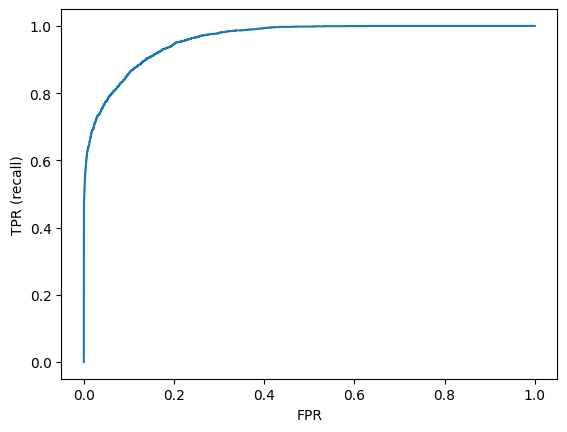

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg_2.decision_function(X_test_rf))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

print(f"ro_auc score is {roc_auc_score(y_test, log_reg_2.decision_function(X_test_rf))}")

Inferential Statistics